In [1]:
import pandas as pd
import math
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [2]:
raw_train = pd.read_csv("../../data/train.csv", parse_dates=['timestamp'],index_col="id")
raw_test = pd.read_csv("../../data/test.csv", parse_dates=['timestamp'],index_col="id")
locales = pd.read_csv("../../data/okurg.csv")

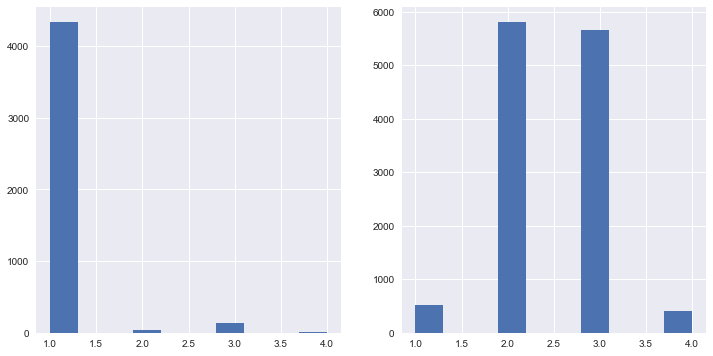

In [16]:
fig, axs = plt.subplots(ncols = 2, figsize=(12,6))
# axs[0].title = 'OwnerOccupier - State'
# axs[1].title = 'Investment - State'
raw_train[(raw_train.state<5) & (raw_train.product_type=='OwnerOccupier')].state.hist(ax=axs[0])
raw_train[(raw_train.state<5) & (raw_train.product_type=='Investment')].state.hist(ax=axs[1])
# raw_train[raw_train.state<5].state.hist(ax=axs[1])

In [13]:
raw_train.product_type.unique()

array(['Investment', 'OwnerOccupier'], dtype=object)

In [70]:
cols = raw_train.columns.tolist()[0:12]
cols.append('price_doc')
df = pd.merge(raw_train[cols],locales, how="left", on="sub_area").reset_index(drop=True).set_index(raw_train.index)
df.drop([2121,20247,17586,26362],axis=0,inplace=True)

In [71]:
df = df.assign(price_full = lambda df: df.price_doc / df.full_sq)
print df.shape
df = df[(df.price_full < 600000) & (df.price_full > 20000)]
print df.shape

(30467, 15)
(30024, 15)


In [72]:
bad_year = df[df.build_year.isnull()]
print bad_year.shape

(13399, 15)


In [107]:
good_state = df[(~df.state.isnull()) &(df.state <6) ]
print good_state.shape
# bad_state.plot.scatter(x='state',y='price_full')
for group in good_state.groupby('state'):
    print group[1].price_full.median()
    

(16684, 15)
107111.055138
154838.709677
160526.315789
177914.527333


(13340, 15)


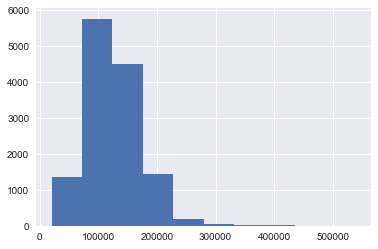

In [122]:
bad_state = df[(df.state.isnull()) | (df.state > 6) ]
print bad_state.shape
# bad_state.plot.scatter(x='state',y='price_full')
# fig, axs = plt.subplots(nrows = 4, figsize=(12,6))
# i = 0
bad_state.price_full.hist()

In [123]:
bad_state.price_full.median()

117398.19827586207

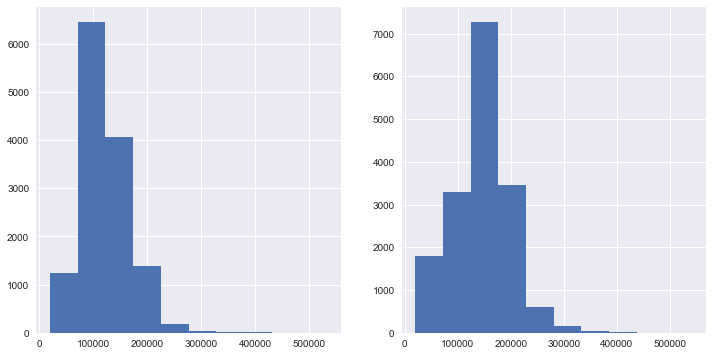

In [74]:
fig, axs = plt.subplots(ncols = 2, figsize=(12,6))
# axs[0].title = "Price to Full with Build Year"
# axs[1].title = "Price to Full without Build Year"
bad_year.price_full.hist(ax=axs[0])
df[~df.build_year.isnull()].price_full.hist(ax=axs[1])

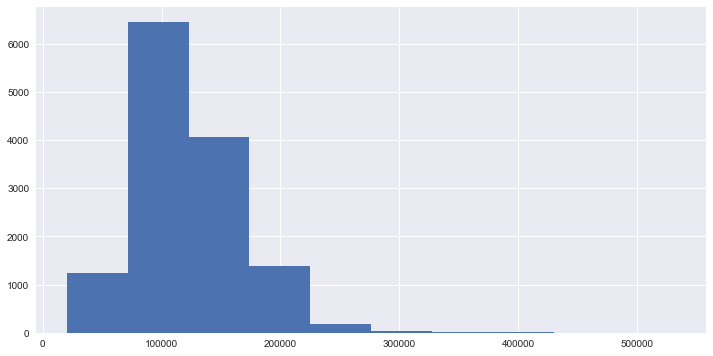

In [53]:
fig, axs = plt.subplots(figsize=(12,6))
bad_year.price_full.hist(ax=axs)

In [124]:
bad_state = raw_test[raw_test.state.isnull()]

In [119]:
bad_state.sub

(0, 290)